In [3]:
# Exercise 1
# 1.1
# As the classes are categorical, use one-hot encoding to represent the set of classes. 
# You will find this useful when developing the output layer of the neural network.
# Note that the dataset doesn't include data points from all grading levels, 
# but you may still need to create the one-hot encoding by 10 cols.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

data = pd.read_csv('winequality-white.csv')

encoder = OneHotEncoder(categories=[range(1, 11)], sparse=False)
encoded_labels = encoder.fit_transform(data[['quality']])
encoded_labels_df = pd.DataFrame(encoded_labels, columns=[f'quality_{i}' for i in range(1, 11)])
data = pd.concat([data.drop('quality', axis=1), encoded_labels_df], axis=1)

# 1.2
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-10])
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns[:-10])
final_data = pd.concat([scaled_data_df, encoded_labels_df], axis=1)

final_data.to_csv('preprocessed_winequality_data.csv', index=False)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 23)             │           276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 17)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 13)             │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058 (4.13 KB)

 Trainable params: 1,058 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1743 - loss: 0.7020 - val_accuracy: 0.1918 - val_loss: 0.1465
Epoch 2/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1792 - loss: 0.3896 - val_accuracy: 0.1918 - val_loss: 0.1444
Epoch 3/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.1912 - loss: 0.3865 - val_accuracy: 0.1918 - val_loss: 0.1437
Epoch 4/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.1799 - loss: 0.3933 - val_accuracy: 0.1918 - val_loss: 0.1439
Epoch 5/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.1775 - loss: 0.3942 - val_accuracy: 0.1918 - val_loss: 0.1425
Epoch 6/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.1901 - loss: 0.3864 - val_accuracy: 0.1918 - val_loss: 0.1431
Epoch 7/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.1814 - loss: 0.3916 - val_accuracy: 0.1918 - val_loss: 0.1420
Epoch 8/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.1850 - loss: 0.387

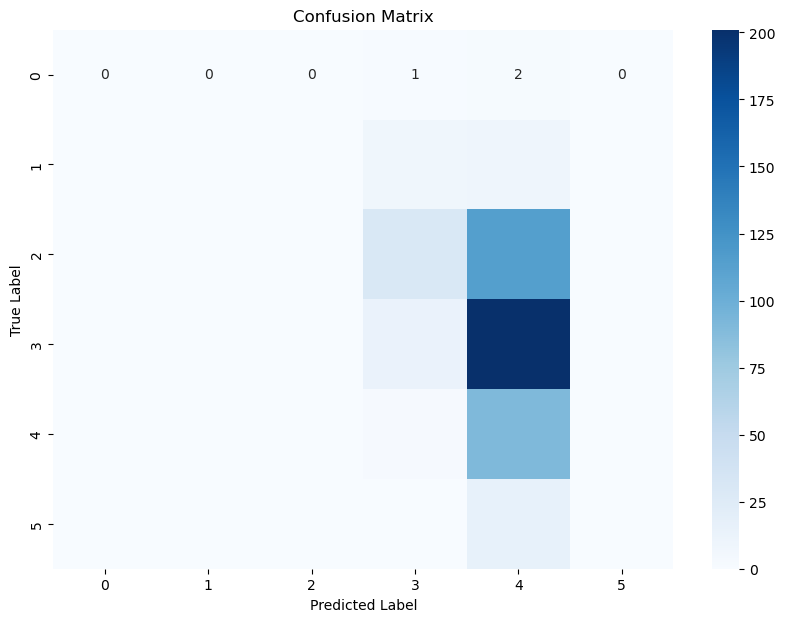

In [14]:
# Exercise 3
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler


# Load the data
data = pd.read_csv('preprocessed_winequality_data.csv')

# input data
X = data.iloc[:, :-10].values.astype(np.float32)

# output data
y = data.iloc[:, -10:].values.astype(np.float32)

# Compute class weights
y_labels = np.argmax(y, axis=1)  # Convert one-hot encoding to class labels
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_labels), y=y_labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Apply oversampling to balance classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build a model
model = keras.Sequential([
    keras.layers.Dense(23, activation='sigmoid', input_shape=(11,)),
    keras.layers.Dense(17, activation='sigmoid'),
    keras.layers.Dense(13, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile a model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.4),
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight_dict)

# Evaluate the data
y_pred = model.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrx = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrx, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

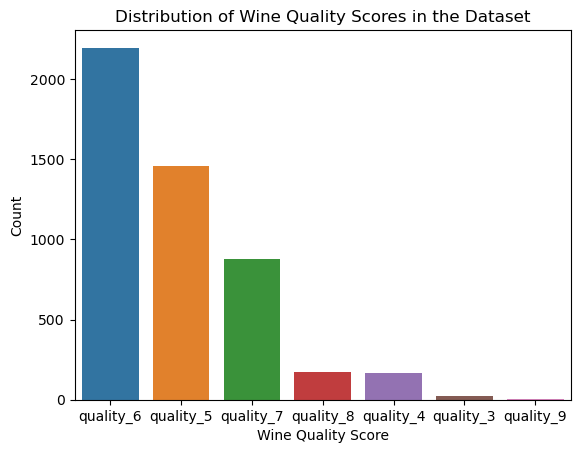

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('preprocessed_winequality_data.csv')
# ワインの品質分布を確認
labels = data.iloc[:, -10:].idxmax(axis=1)  # ワンホットエンコードされたラベルを取得
sns.countplot(x=labels)
plt.xlabel("Wine Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Scores in the Dataset")
plt.show()
